In [7]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import scipy as spy
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации

In [ ]:
#Вспомогательная функция для подсчета доверительного интервала
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

**Статистическая гипотеза** - это предположение о каких-либо характеристиках случайной величины.\
Для проверки статистических гипотез зачастую применяются **статистические тесты**.\
В обобщенном виде алгоритм проверки статистической гипотезы выглядит таким образом:
* Формулировка основной (H0) и альтернативной (H1) гипотез
* Выбор уровня значимости
* Выбор статистического критерия
* Определения правила принятия решения
* Итоговое принятие решения на основе исходной выборки данных\
Данные шаги являются унифицированными и схему можно использовать почти во всех случаях.


**Определение нулевой и альтернативной гипотез** 

Всегда проверяют нулевую гипотезу (H0), которая отвергает эффект (например, разница средних равняется нулю) в популяции. Например, при сравнении показателей курения у мужчин и женщин в популяции нулевая гипотеза H0 означала бы, что показатели курения одинаковые у женщин и мужчин в популяции.

Затем определяют альтернативную гипотезу (H1), которая принимается, если нулевая гипотеза неверна. Альтернативная гипотеза больше относится к той теории, которую собираются исследовать. Итак, на этом примере альтернативная гипотеза H1 заключается в утверждении, что показатели курения различны у женщин и мужчин в популяции.

Разницу в показателях курения не уточнили, т.е. не установили, имеют ли в популяции мужчины более высокие или более низкие показатели, чем женщины. Такой подход известен как двусторонний критерий, потому что учитывают любую возможность, он рекомендуется постольку, поскольку редко есть уверенность заранее в направлении какого-либо различия, если таковое существует.
В некоторых случаях можно использовать односторонний критерий для гипотезы H1, в котором направление эффекта задано.

**Значение р**

Значение р — это вероятность получения вычисленного значения критерия или его еще большего значения, если нулевая гипотеза верна. Иными словами, p - это вероятность отвергнуть нулевую гипотезу при условии, что она верна.

Традиционно полагают, если р < 0,05, ($\alpha$=0,05) то аргументов достаточно, чтобы отвергнуть нулевую гипотезу, хотя есть небольшой шанс против этого. Тогда можно отвергнуть нулевую гипотезу и сказать, что результаты значимы на 5% уровне.

Напротив, если р > 0,05, то аргументов недостаточно, чтобы отвергнуть нулевую гипотезу. Не отвергая нулевую гипотезу, можно заявить, что результаты не значимы на 5% уровне. *Данное заключение не означает, что нулевая гипотеза истинна, просто недостаточно аргументов (возможно, маленький объем выборки), чтобы ее отвергнуть!*

Уровень значимости (т.е. выбранная "граница отсечки") 5% задается произвольно. На уровне 5% можно отвергнуть нулевую гипотезу, когда она верна. Если это может привести к серьезным последствиям, необходимо потребовать более веских аргументов, прежде чем отвергнуть нулевую гипотезу, например, выбрать значение  = 0,01 (или 0,001).

Определение результата только как значимого на определенном уровне граничного значения (например 0,05) может ввести в заблуждение. Например, если р = 0,04, то нулевую гипотезу отвергаем, но если р = 0,06, то ее не отвергли бы. Действительно ли они различны? Рекомендуется всегда указывать точное значение р, обычно получаемое путем компьютерного анализа.

# Статистическая проверка гипотез

Большинство тестов работает с нормально распределенными данными, поэтому первым делом нужно проверить данные на нормальность.

### Гистограмма
Можно посмотреть и оценить визуально

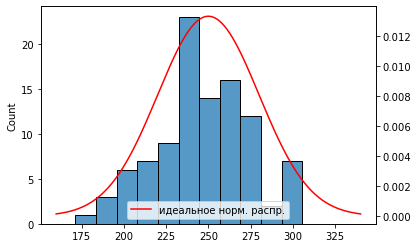

In [72]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
data = stats.norm.rvs(scale = 30, loc = 250, size = 100)

# данные для построения кривой идеального нормального распределения
# импортируем объект norm из модуля stats библиотеки scipy
from scipy.stats import norm
# пропишем среднее значение и станд. отклонение такие же как в созданной выборке
mean, std = 250, 30
# создадим пространство из 1000 точек в диапазоне +/- трех стан. откл. от среднего значения
x = np.linspace(mean - 3 * std, mean + 3 * std, 1000)
# рассчитаем значения по оси y с помощью метода .pdf(), т.е. функции плотности вероятности
y = norm.pdf(x, mean, std)

# построим все на одном графике
fig, ax = plt.subplots()
# Построим гистограмму
sns.histplot(data)
# и построим кривую идеального рсапределения
ax2 = ax.twinx()
sns.lineplot(x=x, y=y, color='r', ax=ax2, label='идеальное норм. распр.')
plt.show()

### QQ-Plot
Можно построить QQ график и также оценить характер распределения визуально

In [8]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
data = stats.norm.rvs(scale = 30, loc = 250, size = 100)

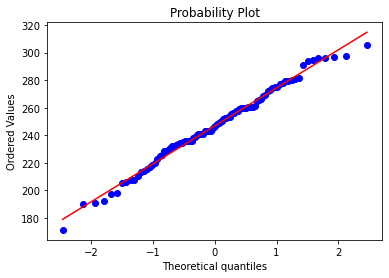

In [69]:
# Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
stats.probplot(data, dist="norm", plot=plt);  

# Критерий Шапиро-Уилка
Проверка на принадлежность выборки нормальной генеральной совокупности\
H0: распределение выборки нормально\
H1: распределение выборки не нормально

In [39]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
data = stats.norm.rvs(scale = 30, loc = 250, size = 100)

stat, p = stats.shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Not Normal distribution (reject H0)')

Statistics=0.990, p=0.655
Normal distribution (fail to reject H0)


**p_value > 0.05, значит не можем отклонить нулевую гипотезу, значит распределение нормальное**

<hr>

# t-критерий Стьюдента 


t-критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках. Нулевая гипотеза предполагает, что средние равны (отрицание этого предположения называют гипотезой сдвига).

**Требование к даным для применения t-теста.** Данные должно быть распределены нормально. \
Есть мнение, что требование нормальности данных относится только для выборок меньше 30. При больших выборках нормальность необязательна. Нормальным должно быть распределение средних (проверка методом бутстрапа)! [Источник](https://koch-kir.medium.com/%D0%B8%D1%81%D1%82%D0%BE%D1%80%D0%B8%D1%8F-%D0%BE%D0%B4%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BE%D0%B1%D0%BC%D0%B0%D0%BD%D0%B0-%D0%B8%D0%BB%D0%B8-%D1%82%D1%80%D0%B5%D0%B1%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F-%D0%BA-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8E-%D0%B2-%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85-%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%85-55139a5558d)

Критерий Стьюдента имеет несколько разновидностей, все они являются параметрическими.

## t-распределение

Форма распределения Стьюдента похожа на форму нормального распределения (чем больше число степеней свободы, тем ближе распределение к нормальному). Отличием является то, что «хвосты» распределения Стьюдента медленнее стремятся к нулю, чем «хвосты» нормального распределения.

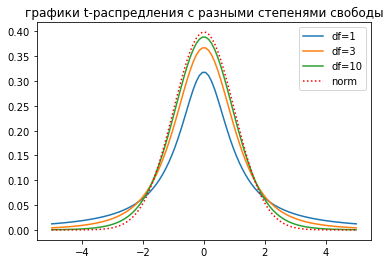

In [79]:
'''График снизу показывает, как меняется форма распределения при увеличение количества степеней свободы.
А также показывает приближение t-распредееления к нормальному по мере увеличения степеней свободы.'''
from scipy.stats import t, norm
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 100)
y1, y2, y3 = t.pdf(x, df=1), t.pdf(x, df=3), t.pdf(x, df=10)
y4 = norm.pdf(x)

plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.show()

## 1. Одновыборочный (выборка + ГС)
Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!).\
H0:  $\bar{X} = μ$ \
H1:   $\bar{X} \neq  μ$ 

t-критерий вычисляется по формуле:
$$ \large t = \frac{\bar{X} - μ}{\frac{sd}{\sqrt n}} $$ 

$\bar{X}$  - выборочное среднее \
μ - среднее ГС \
sd - выборочное стандартное отклонение \
n - размер выборки \

Вычисленное значение t проверяют на предмет попадания в критическую область (критическое значение можно найти по таблицам или например на сайте https://gallery.shinyapps.io/dist_calc/). \
Если вычисленное значение t попадает в критическую область, то говорят, что H0 отвергается на уровне α в пользу альтернативы.



**Пример.** Предположим, ботаник хочет знать, равна ли средняя высота определенного вида растения 15 дюймам. Она собирает случайную выборку из 12 растений и записывает их высоту в дюймах.

H0 : µ = 15 (средняя высота этого вида растений составляет 15 дюймов)\
H1 : µ ≠15 (средняя высота не 15 дюймов)

In [3]:
data = [14, 14, 16, 13, 12, 17, 15, 14, 15, 13, 15, 14]

In [5]:
import scipy.stats as stats

# one sample t-test
# a: массив выборочных наблюдений
# popmean: ожидаемое среднее значение населения
stat, p = stats.ttest_1samp(a=data, popmean=15)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=-1.685, p=0.120
Same distribution (fail to reject H0)


**Поскольку p-значение нашего теста (0,12) больше, чем альфа = 0,05, мы не можем отвергнуть нулевую гипотезу теста. У нас нет достаточных доказательств, чтобы сказать, что средняя высота этого конкретного вида растений отличается от 15 дюймов.**

## 2. Двухвыборочный (независимые выборки)

t-критерий для двух независимых выборок (двухвыборочный t-критерий) проверяет гипотезу о равенстве средних в двух выборках. Критерий применяется, например, если необходимо сравнить результаты баллов ЕГЭ в двух разных школах.

H0:  $\bar{X_1} = \bar{X_2}$ \
H1:  $\bar{X_1} \neq \bar{X_2}$

t-критерий вычисляется по формуле:
$$ \large t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}             }} $$ 

$\bar{X_{1,2}}$  - выборочные средние \
$sd_{1,2}$ - выборочное стандартное отклонение \
$n_{1,2}$ - размеры выборок 

In [38]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

stat, p = stats.ttest_ind(A, B) #Критерий Стьюдента (t-test)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=2.465, p=0.014
Different distribution (reject H0)


**p_value меньше уровня значимости: 0.014 < 0.05, значит отклоняем нулевую гипотезу о равенстве средних, значит различие между выборками статистически значимо**

Можно посмотреть и убедиться в этом визуально:

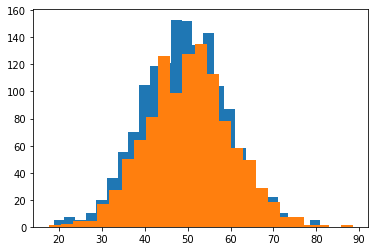

In [33]:
plt.hist(B, bins=25); 
plt.hist(A, bins=25); 

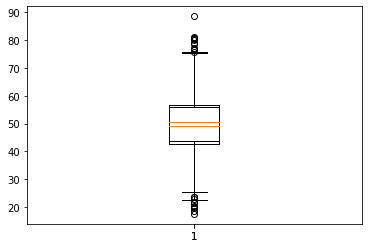

In [34]:
plt.boxplot(A);
plt.boxplot(B);

## 3. Двухвыборочный (зависимые выборки)
H0:  $\bar{X_1} = \bar{X_2}$ \
H1:  $\bar{X_1} \neq \bar{X_2}$

По другому называется t-критерий парной выборки. Представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. Каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Например, применяется для оценки состояния больного до и после лечения. 



t-критерий вычисляется по формуле:
$$ ... $$ 

$\bar{X_{1,2}}$  - выборочные средние \
$sd_{1,2}$ - выборочное стандартное отклонение \
$n_{1,2}$ - размеры выборок 

Предположим, нас интересует оценка эффективности программы обучения компании. Один из подходов, который можно рассмотреть - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного t-критерия. \
H0: Уровень производительности сотрудников не изменился.

In [26]:
np.random.seed(42)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)
df = pd.DataFrame( {"before":before,
                    "after":after,
                    "change":after-before})
df.describe()

,before,after,change
count,100.000000,100.000000,100.000000
mean,246.884604,246.723127,-0.161477
std,27.245053,27.010808,4.768345
min,171.407647,172.518101,-9.866856
25%,231.972830,229.732678,-4.301303
50%,246.191311,247.144815,0.147536
75%,262.178562,261.714136,2.417852
max,305.568346,306.534314,13.327846


In [40]:
stat, p = stats.ttest_rel(a=before, b=after)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.339, p=0.736
Same distribution (fail to reject H0)


**p_value > 0.05. Нулевую гипотезку не можем отклонить, производительность сотрудников не изменилась.**

# Критерий Пирсона ($\chi^{2}$)

Есть несколько тестов, основанных на χ².

### 1. Тест на гомогенность

Тест на гомогенность (test of homogeneity, он же goodness of fit) — непараметрический, одновыборочный тест, который проверяет соответствие наблюдаемого распределения категориальной случайной величины некоторому эталонному распределению. В Python реализован функцией scipy.stats.chisquare.

H0: между наблюдаемым распределением и эталонным распределением нет различий;\
H1: между наблюдаемым распределением и эталонным распределением есть различия.

Если различий нет, то критерий будет стремиться к нулю. В противном случае она окажется за пределами интервала наиболее вероятных значений:
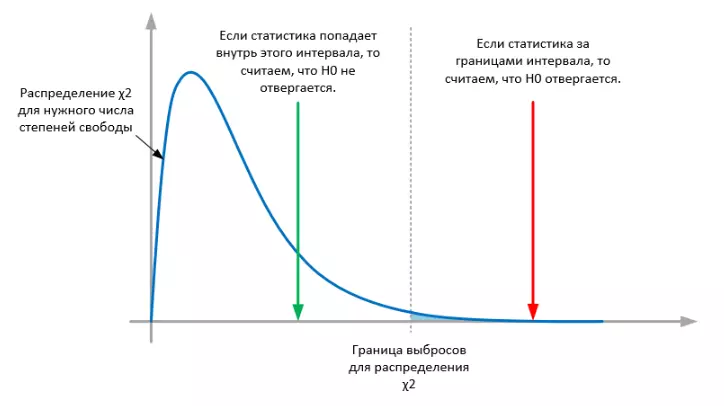


**Опыт с подбрасыванием монеты.** Предположим, что монету подбросили 60 раз. Из них 20 раз выпала решка и 40 раз выпал орел. Нужно выяснить это "честная" монета или нет.

Гипотезы можно переписать так:\
H0: вероятность выпадения решки = вероятности выпадения орла или по другому $P_{орел} = 0,5$\
H1: вероятность выпадения решки $\neq$ вероятности выпадения орла или по другому $P_{орел} \neq 0,5$

O - observed (наблюдаемый) - это наблюдаемые значение, то есть 20 и 40 соответственно  
E - expected (ожидаемый) - это ожидаемые значения, то есть 30 и 30.

In [150]:
# Сгенерируем табличку 
contingency_table = pd.DataFrame(
    [  
[20, 40],
[30, 30]
    ],
    columns = ['Решка', 'Орел'],
    index = ['O - observed', 'E - expected '])
print(contingency_table)

               Решка  Орел
O - observed      20    40
E - expected      30    30


Для проверки гипотезы используется расстояние $\chi^{2}$ Пирсона. Он показывает насколько сильно расхождение между наблюдаемым и ожидаемым значением. Вычисляется по формуле:
$$ \chi^{2} = \sum_{i=1}^{n} \frac{(O_i-E_i)^2}{E_i}$$

In [87]:
# для нашего случая хи-квадрат равен:
(20-30)**2/30 + (40-30)**2/30

6.666666666666667

Если таким образом многократно проводить эксперимент с монеткой и записывать значения $\chi^{2}$ и нарисовать гистограмму распредлений этих значений, то получим распределе́ние $\chi ^{2}$.

**Распределе́ние $\chi ^{2}$ (хи-квадра́т) с k степеня́ми свобо́ды — распределение суммы квадратов k независимых стандартных нормальных случайных величин.**

Чтобы увидеть как выглядит **распределение $\chi^{2}$** для степени свободы df=1 можно сделать следующую симуляцию. Будем "подбрасывать" монету 60 раз, записывать значение $\chi^{2}$ и так 10000 раз. Далее построим гистограмму записанных значений.

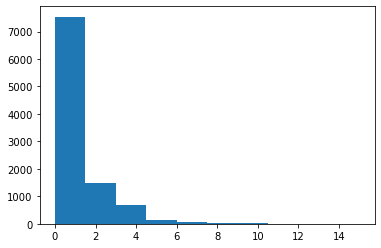

In [127]:
# 1 - решка, 0 - орел
import random

def monetka():
    cnt_1 = 0
    cnt_0 = 0
    for _ in range(60):
        if random.randint(0,1):
            cnt_1 += 1
        else:
            cnt_0 += 1   
    return (cnt_1 - 30)**2/30 + (cnt_0 - 30)**2/30
    
chi = []

for _ in range(10000):
    chi.append(monetka())

    
plt.hist(chi, bins=10);


По гистограмме видно, что наибольшее кол-во отклонений наблюдаемых и ожидаемых частот незначительные (около нуля), остальные встречаются гораздо реже.



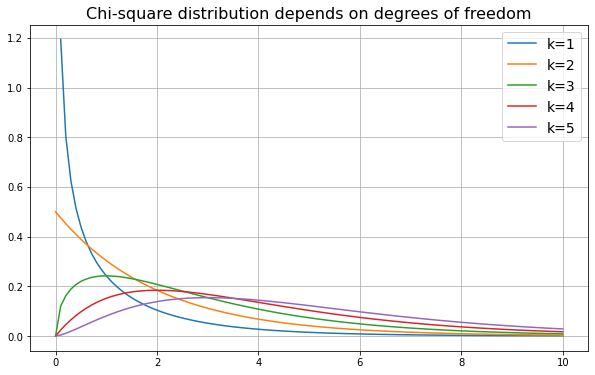

In [143]:
# как выглядит распределение хи-квадрат при различных степенях свободы

from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df_s = 5

x = np.linspace(0, 10, 100)

for i in range(df_s):
    df = i + 1
    plt.plot(x, chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()

**Степени свободы** df. Объяснение как для монетки (два возможных исхода) получилось df=2. Зная общее кол-во экспериментов (в нашем пример 60) и зная кол-во выпавших орлов (например, 25), мы всегда можем сказать сколько выпало решек (60-25).\
Например, для шестигранного кубика (6 возможных исходов) степент свободы df = 5.

Выше посчитали хи-квадрат для нашего случая, он равен 6,67. С помощью калькулятора https://gallery.shinyapps.io/dist_calc/ найдем вероятность получить такое или еще более выраженное отклонение: 0,0098 < 0,05. **Что говорит о том, что мы можем отклонить нулевую гипотезу о "честности" монеты (полученное распределение статистически значимо отличается от ожидаемого при уровне значимости 0,05)**

In [181]:
# также можно воспользоваться библиотекой для получения значения p_value
1-stats.chi2.cdf(6.67, 1)

0.009804918845847554

In [177]:
# библиотечная реализация теста хи квадрат
# проверяет соответствие наблюдаемого распределения эталонному распределению
from scipy.stats import chisquare
chi, pval = chisquare(f_obs = [20, 40], f_exp=[30, 30])

alpha = 0.05
print('p-value=%.6f' % (pval))

if pval < alpha:
    print('Отвергаем нулевую гипотезу и принимаем H1')
    print('Полученное распределение статистически значимо отличается от ожидаемого при уровне значимости', alpha)
else:
    print('Принимаем нулевую гипотезы')
    print('Полученное распределение статистически не отличается от ожидаемого при уровне значимости', alpha)    

p-value=0.009823
Отвергаем нулевую гипотезу и принимаем H1
Полученное распределение статистически значимо отличается от ожидаемого при уровне значимости 0.05


Результаты полностью совпадают.

### 2. Тест на независимость

Тест на независимость (он же test of independence/association) — непараметрический, одновыборочный тест, который проверяет наличие связи между двумя категориальными переменными. В Python реализован функцией scipy.stats.chi2_contingency.

Отличается от предыдущего теста постановкой гипотез:\
H0: категориальные переменные A и B независимы;\
H1: категориальные переменные A и B связаны между собой.

**Пример.** Одна из его задач сказать, насколько случайно распределены значения между группами. Позволяет проверить гипотезу, есть ли значимый перевес между группами.\
H0: категориальные переменные A и B независимы = между распределениями нет различий = уровень в городской и сельской школах одинаковый;\
H1: категориальные переменные A и B связаны между собой = между распределениями есть различия = уровень в городской и сельской школах отличается

Используя критерий «хи-квадрат» при уровне значимости α = 0,05, проверить,
существует ли зависимость уровня интеллектуального развития учеников от типа школы
по результатам обследования 100 сельских и 100 городских школьников: 

In [247]:
# Сгенерируем табличку 
contingency_table = pd.DataFrame(
    [  
[25, 50, 25],
[52, 41, 7]
    ],
    columns = ['Низкий', 'Нормальный', 'Высокий'],
    index = ['Городская', 'Сельская'])
print('Уровень интеллектуального развития')
print(contingency_table)

Уровень интеллектуального развития
           Низкий  Нормальный  Высокий
Городская      25          50       25
Сельская       52          41        7


In [248]:
# Просуммируем по столбцам и строкам и получим
contingency_table_sum = pd.DataFrame(
    [  
[25, 50, 25, 25+50+25],
[52, 41, 7, 52+41+7],
[25+52, 50+41, 25+7, 25+50+25+52+41+7]        
    ],
    columns = ['Низкий', 'Нормальный', 'Высокий', 'Всего'],
    index = ['Городская', 'Сельская', 'Всего'])
print('Уровень интеллектуального развития')
print(contingency_table_sum)

Уровень интеллектуального развития
           Низкий  Нормальный  Высокий  Всего
Городская      25          50       25    100
Сельская       52          41        7    100
Всего          77          91       32    200


Как посчитать ожидаемые значение? Нулевая гипотеза говорит что уровень не зависит от школы. Значит распределение должно быть одинаковым в обоих видах школ.\
Низкий уровень: 77 из 200 - это 38,5%\
Средний уровень: 91 из 200 - это 45,5%\
Высокий уровень: 32 из 200 - это 16%

Значит ожидаемые значения:\
38,5% от 100 - это 38,5\
45,5% от 100 - это 45,5\
16% от 100 - это 16

Получим следующую таблицу с ожидаемыми значениями:

In [249]:
contingency_table_E = pd.DataFrame(
    [  
[38.5, 45.5, 16, 100],
[38.5, 45.5, 16, 100],
[77, 91,32, 200]        
    ],
    columns = ['Низкий', 'Нормальный', 'Высокий', 'Всего'],
    index = ['Городская', 'Сельская', 'Всего'])
print('Уровень интеллектуального развития')
print(contingency_table_E)

Уровень интеллектуального развития
           Низкий  Нормальный  Высокий  Всего
Городская    38.5        45.5       16    100
Сельская     38.5        45.5       16    100
Всего        77.0        91.0       32    200


Есть формула для расчета ожидаемых частот в таблице сопряженности:
$$f_{i,j} = \frac{f_i * f_j}{N} $$
 
$f_i$ - число наблюдений в i−ой строке\
$f_j$ - число наблюдений в j−ом столбце\
$N$ - общее количество наблюдений в таблице. 

По известной формуле можем посчитать хи-квадрат:

In [250]:
(38.5-25)**2/38.5 + (45.5-50)**2/45.5 + (16-25)**2/16 + (38.5-52)**2/38.5 + (45.5-41)**2/45.5 + (16-7)**2/16 

20.48264235764236

Число степеней свободы: df = (n-1)(m-1) = (3-1)(2-1) = 2

In [243]:
# значение p_value
1-stats.chi2.cdf(20.48, 2)

3.5712849641655886e-05

**Значение p < 0,05. Отвергаем нулевую гипотезу, уровень в городской и сельской школах отличается**

В библиотечной реализации почему-то значение степеней свободы считается по другому:

In [274]:
chi, pval, dof, exp = stats.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
alpha = 0.05
print('chi=%.6f, p-value=%.6f' % (chi, pval))
print(f'dof={dof}')
print('Ожидаемое распределение:')
print(exp)

if pval < alpha:
    print('Отвергаем нулевую гипотезу и принимаем H1 (между распределениями есть различия)')
    print('Существует зависимость уровня интеллектуального развития учеников от типа школы')
else:
    print('Принимаем нулевую гипотезы (между распределениями нет различий)')
    print('Нет зависимости уровня интеллектуального развития учеников от типа школы ')    
    
# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

chi=20.482642, p-value=0.000036
dof=2
Ожидаемое распределение:
[[38.5 45.5 16. ]
 [38.5 45.5 16. ]]
Отвергаем нулевую гипотезу и принимаем H1 (между распределениями есть различия)
Существует зависимость уровня интеллектуального развития учеников от типа школы


Значение посчитанные вручную и библиотечные совпадают, все ок!

### Поправка Йетса
В теории распределение хи-квадрат непрерывно, тогда как вычисляемые значения дискретны, в результате нулевая гипотеза может слишком часто отклоняться. Чтобы скорректировать значения p-уровня значимости применяется поправка Йетса на непрерывность. Обычно она применяется когда ожидаемые частоты меньше 10. В библиотечных пакетах она применяется автоматически.

$$ \chi^{2}_{Yates} = \sum_{i=1}^{n} \frac{(|O_i-E_i|-0.5)^2}{E_i}$$

### 3. Тест на принадлежность выборки теоретическому закону распределения
для проверки гипотезы о принадлежности некоторой выборки теоретическому закону распределения 

In [3]:
# Пример проверки гипотезы о принадлежности данных нормальному распрделению
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

stat, p = stats.normaltest(A) 
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Normal distribution (fail to reject H0)')
else:
	print('Not Normal distribution (reject H0)')

Statistics=6.579, p=0.037
Not Normal distribution (reject H0)


### Требования к выборке для χ²-теста

- каждая из ячеек таблицы сопряженности была больше 5 (если нет, то это легко исправляется умножением таблицы на нужный множитель)
- общий размер сэмпла не более 500, так как увеличение размера сэмпла вызывает рост статистики и вероятности ложноположительных результатов.

# Точный критерий Фишера
Точный критерий Фишера используется для определения того, существует ли значительная связь между двумя категориальными переменными. Используется в анализе таблиц сопряжённости **для выборок маленьких размеров.** \
H0 : Две переменные независимы (носят случайный характер)\
H1 : Две переменные не являются независимыми.

Условия применения критерия Фишера:
* Две переменные являются категориальными (номинальными)
* Выборки независимы (две группы никак не связаны между собой)

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты 
Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).

In [42]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


H0: предсказания носят случайный характер, нет взаимосвязи между предсказаниями и реальной погодой.

In [45]:
stat, pvalue = stats.fisher_exact(observations)

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('переменные независимы (НЕ отвергаем H0)')
else:
	print('переменные не являются независимыми (отвергаем H0)')

Statistics=0.581, p=0.736
переменные независимы (НЕ отвергаем H0)


# F-тест Фишера
Используется для проверки равенства двух дисперсий, для нормальных распределений.\
H0: обе выборки имеют одинаковые дисперсии \
Не нашел готовой библиотечной функции, но на просторах интернета нашел такую функцию:

In [62]:
def f_test(x, y):
  """ F-test """
  f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
  dfn = x.size-1 #define degrees of freedom numerator 
  dfd = y.size-1 #define degrees of freedom denominator 
  p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
  return f, p

In [64]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

# Тест
stat, p = f_test(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.965, p=0.735
Same distribution (fail to reject H0)


# Критерий Флигнера-Килина
Используется для проверки равенства двух дисперсий. Не требует предположений о нормальности сравниваемых выборок.\
H0: обе выборки имеют одинаковые дисперсии

In [8]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

stat, p = stats.fligner(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.339, p=0.560
Same distribution (fail to reject H0)


# U-Критерий Манна-Уитни
Критерий Манна-Уитни представляет непараметрическую альтернативу t-критерия для независимых выборок. Преимущество его состоит в том, что мы отказываемся от предположения нормальности распределения и одинаковых дисперсий. Необходимо, чтобы данные были измерены как минимум в порядковой шкале.\
H0: нет различий между распределениями выборок данных

In [10]:
# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
np.random.seed(42)
A = stats.norm.rvs(loc=50, scale=10, size=1100)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 

stat, p = stats.mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=781301.000, p=0.010
Different distribution (reject H0)


# Дисперсионный анализ

Рассмотренный выше **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


Условия для применения:
* Выборки независимы.
* Каждая выборка взята из нормально распределенной популяции. Актуально для выборок с небольшим кол-вом наблюдений, до 30. Для выборок с большим кол-вом это требование необязательно соблюдать.
* Стандартные отклонения популяции для всех групп равны (гомоскедастичность)

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
30.0=24.0+6.0
F-значение=12.0
p-value=0.008000000000000002
Результат:
отклоняем нулевую гипотезу


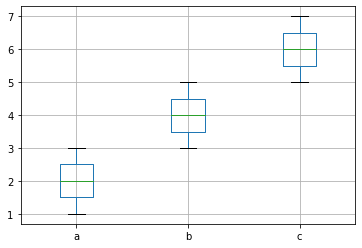

In [73]:
# Выборки которые надо сравнить
data = pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')

# общая средняя
grand_mean = data.values.mean()

# Общая сумма квадратов sst = ssb + ssw
sst = ((data - grand_mean)**2).values.sum()

# отклонение групповых средний от общей средней
ssb = (data.count(axis=0) * (data.mean(axis=0) - grand_mean)**2).values.sum()

# отклонения значений внутри группы от средней группы
ssw = ((data - data.mean(axis=0))**2).values.sum()

print(f'{sst}={ssb}+{ssw}')

group_count = data.shape[1]

# межгрупповой средний квадрат
dfb = group_count - 1
mssb = ssb/dfb

# внутригрупповой средний квадрат
dfw = data.size - group_count
mssw = ssw/dfw

f_value = mssb/mssw
print(f"F-значение={f_value}")

p = stats.f.sf(f_value, dfb, dfw)
print(f'p-value={p}')

alpha = 0.05
print('Результат:')
if p > alpha:
    print('НЕ отклоняем нулевую гипотезу')
else:
    print('отклоняем нулевую гипотезу')


In [17]:
# библиотечная функция для дисперсионного анализа

stat, p = stats.f_oneway(*data.values.T)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('НЕ отклоняем нулевую гипотезу')
else:
    print('отклоняем нулевую гипотезу')

Statistics=12.000, p=0.008
отклоняем нулевую гипотезу
